# CISS-VAE Quickstart

The **Clustering-Informed Shared-Structure Variational Autoencoder (CISS-VAE)** is a flexible deep learning model for missing data imputation that accommodates all three types of missing data mechanisms: Missing Completely At Random (MCAR), Missing At Random (MAR), and Missing Not At Random (MNAR). While it is particularly well-suited to MNAR scenarios where missingness patterns carry informative signals, CISS-VAE also functions effectively under MAR assumptions. Please see our <a href="https://doi.org/10.1002/sim.70335"> publication </a> for more details.

![**Example CISS-VAE for Imputation Workflow**](CISSVAEModelDiagram.png)

## Installation
The CISS-VAE package is currently available for python, with an R
package to be released soon. It can be installed from either
[github](https://github.com/CISS-VAE/CISS-VAE-python) or PyPI.

``` bash
# From PyPI 
pip install ciss-vae

```

``` bash
# From GitHub (latest development version)
pip install git+https://github.com/CISS-VAE/CISS-VAE-python.git
```

<div>

> **Note**
>
> If you want run_cissvae to handle clustering, please install the
> clustering dependencies scikit-learn, leidenalg, python-igraph with pip.
>
> ``` bash
> pip install scikit-learn leidenalg python-igraph
>
> OR
>
> pip install ciss-vae[clustering]
> ```

</div>

## Quickstart
If your data has binary or categorical variables, please see the [binary data vignette](https://ciss-vae.readthedocs.io/en/latest/binary_vignette.html).
To load the sample dataset:


In [1]:
from ciss_vae.data import load_example_dataset
df_missing, df_complete, clusters = load_example_dataset()

To run the CISSVAE imputation model with default parameters (assuming known clusters).

Cluster dataset:
 ClusterDataset(n_samples=8000, n_features=30, n_clusters=4)
  • Original missing: 61800 / 200000 (30.90%)
  • Validation held-out: 13783 (9.97% of non-missing)
  • .data shape:     (8000, 30)
  • .masks shape:    (8000, 30)
  • .val_data shape: (8000, 30)


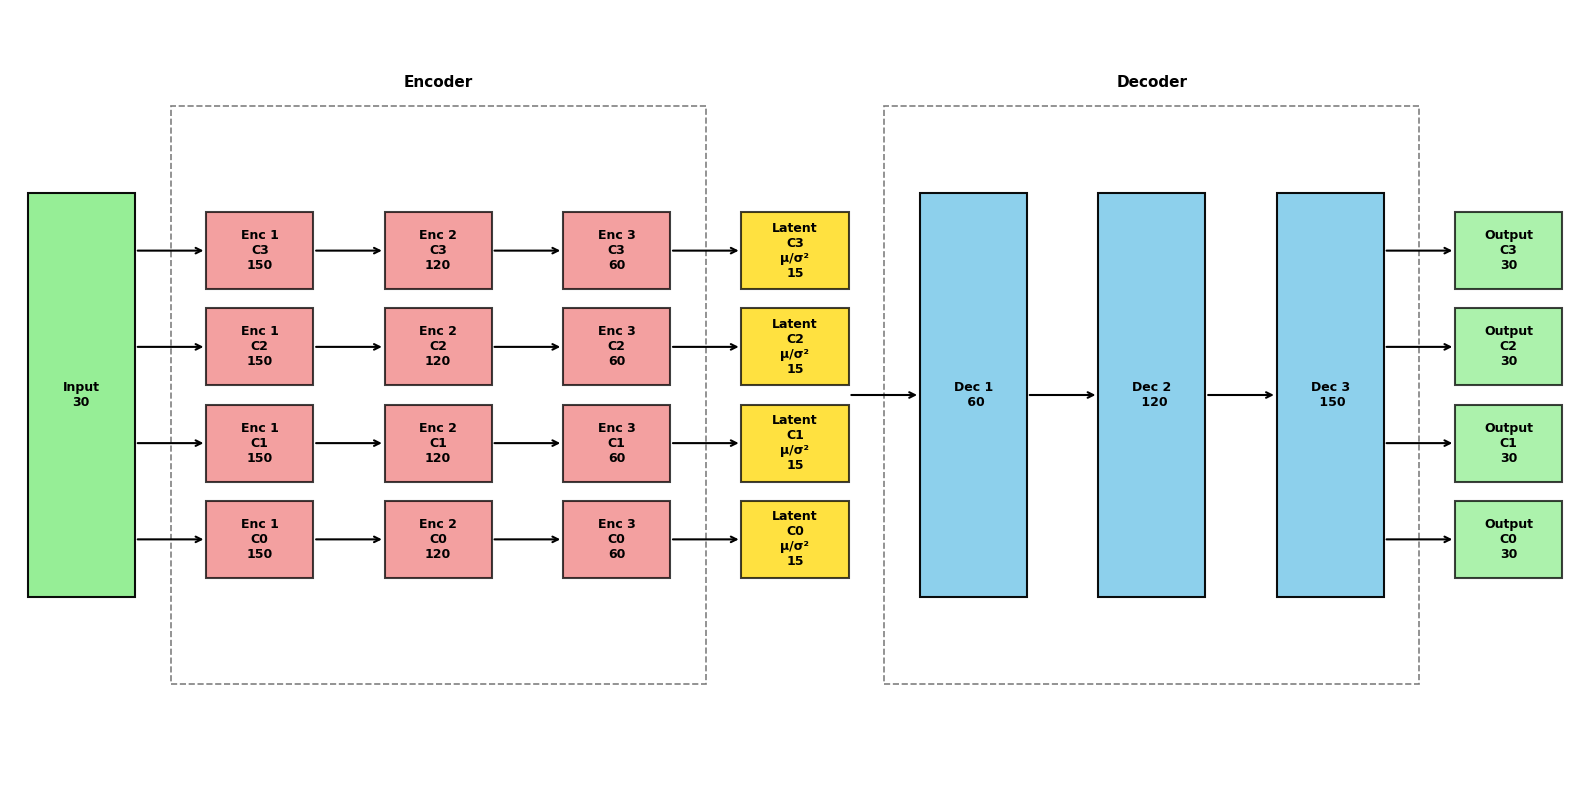

In [2]:
import pandas as pd
from ciss_vae.training.run_cissvae import run_cissvae
# optional, display vae architecture
from ciss_vae.utils.helpers import plot_vae_architecture

imputed_data, vae = run_cissvae(
    data = df_missing,
    columns_ignore = df_missing.columns[:5], ## columns to ignore when selecting validation dataset (and clustering if you do not provide clusters).
    clusters = clusters
)

## OPTIONAL - PLOT VAE ARCHITECTURE
plot_vae_architecture(model = vae,
                        title = None)

To have run_cissvae() perform data clustering with Leiden: 

Cluster dataset:
 ClusterDataset(n_samples=8000, n_features=30, n_clusters=2)
  • Original missing: 61800 / 200000 (30.90%)
  • Validation held-out: 13808 (9.99% of non-missing)
  • .data shape:     (8000, 30)
  • .masks shape:    (8000, 30)
  • .val_data shape: (8000, 30)


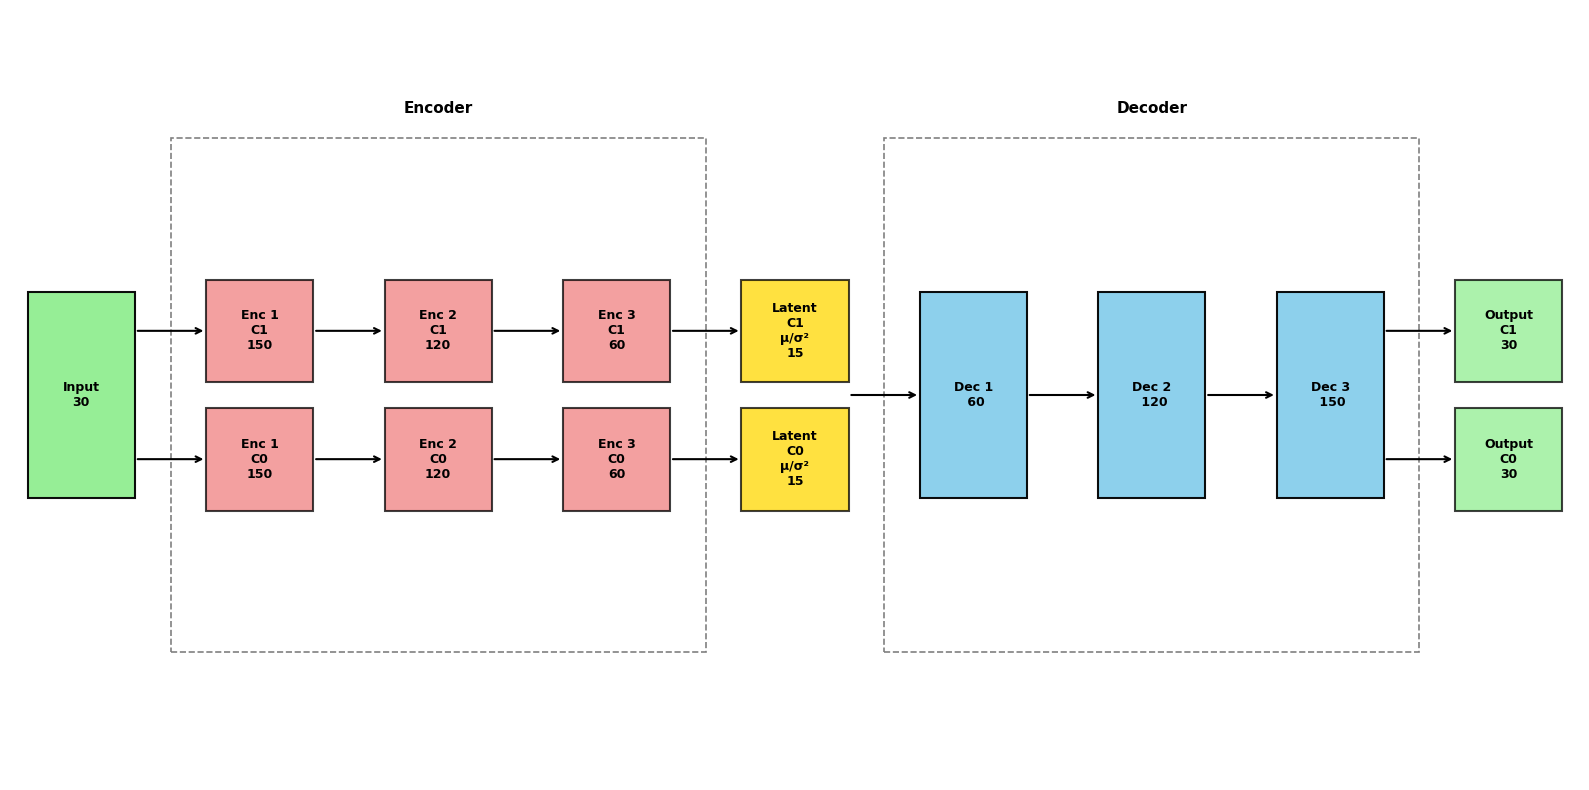

In [3]:
imputed_data, vae = run_cissvae(
    data = df_missing,
    columns_ignore = df_missing.columns[:5], ## columns to ignore when selecting validation dataset (and clustering if you do not provide clusters).
    clusters = None,
    k_neighbors = 500,
    leiden_resolution = 0.001,
    epochs = 100
)
## OPTIONAL - PLOT VAE ARCHITECTURE
plot_vae_architecture(model = vae,
                        title = None)